In [33]:
def get_metrics(input_file):
#     print("input file: ", input_file)
    f = open(input_file,"r")
    fl = f.readlines()
    f.close()

    count = 1
    metrics = []
    file_name = input_file.split(".")[0]
    split_title = file_name.split("_")
#     print(split_title)
    metrics.extend([float(split_title[3])])
    for line in fl:
    #     print(line)
        if count >= 32 and count < 37:
            _, val_str = line.split(":") 
            if defocus.match(line):
                val=float(val_str.split(",")[0])
                metrics.append(val)
    #             print(val)
            if score.match(line):
                val=float(val_str)
                metrics.append(val)
    #             print(val)
            if thon_rings.match(line):
                val=float(val_str.split("Angstroms")[0])
                metrics.append(val)
    #             print(val)
        count+=1
    all_metrics[split_title[4]][split_title[0]].append(metrics)

In [34]:
import sys
import re
import os
from collections import defaultdict
import glob
import matplotlib.pyplot as plt
import numpy as np

defocus = re.compile(r"Estimated defocus values[ ]+: [-+]?[0-9]*\.?[0-9]+ , [-+]?[0-9]*\.?[0-9]+ Angstroms")
score = re.compile(r"Score[ ]+: [-+]?[0-9]*\.?[0-9]+")
thon_rings = re.compile(r"Thon rings with good fit up to[ ]+: [-+]?[0-9]*\.?[0-9]+ Angstroms")

all_metrics = defaultdict(lambda: defaultdict(list))
for f in glob.glob('*summary*.txt'):
    get_metrics(f)

In [35]:
all_metrics

defaultdict(<function __main__.<lambda>()>,
            {'nn': defaultdict(list,
                         {'stack15': [[1500.0, 16819.6, 0.00677, 1536.0],
                           [50.0, 5855.0, 0.00802, 1536.0],
                           [2000.0, 16680.89, 0.00782, 1536.0],
                           [250.0, 6203.99, 0.00867, 1536.0],
                           [750.0, 20962.49, 0.00798, 1536.0]],
                          'stack1': [[750.0, 19578.49, -0.00239, 6.7],
                           [1500.0, 19578.49, -0.00239, 6.7],
                           [50.0, 19603.21, -0.00291, 6.7],
                           [2000.0, 19593.07, -0.00252, 6.8],
                           [250.0, 19603.21, -0.00291, 6.7]],
                          'stack18': [[1500.0, 18130.94, 0.00855, 6.1],
                           [2000.0, 18123.25, 0.00923, 6.1],
                           [750.0, 18108.99, 0.00904, 6.0],
                           [250.0, 18093.24, 0.00944, 6.1],
                         

In [36]:
all_metrics['cubic']['stack19']

[[750.0, 19568.62, 0.00875, 5.3],
 [1500.0, 19569.92, 0.00873, 5.4],
 [50.0, 19568.81, 0.0083, 5.4],
 [2000.0, 19568.8, 0.00874, 5.4],
 [250.0, 19567.29, 0.00849, 5.4]]

getting interpolation type with nn
stack15
stack1
stack18
stack10
stack19
getting interpolation type with cubic
stack1
stack18
stack15
stack10
stack19
getting interpolation type with linear
stack10
stack15
stack18
stack19
stack1


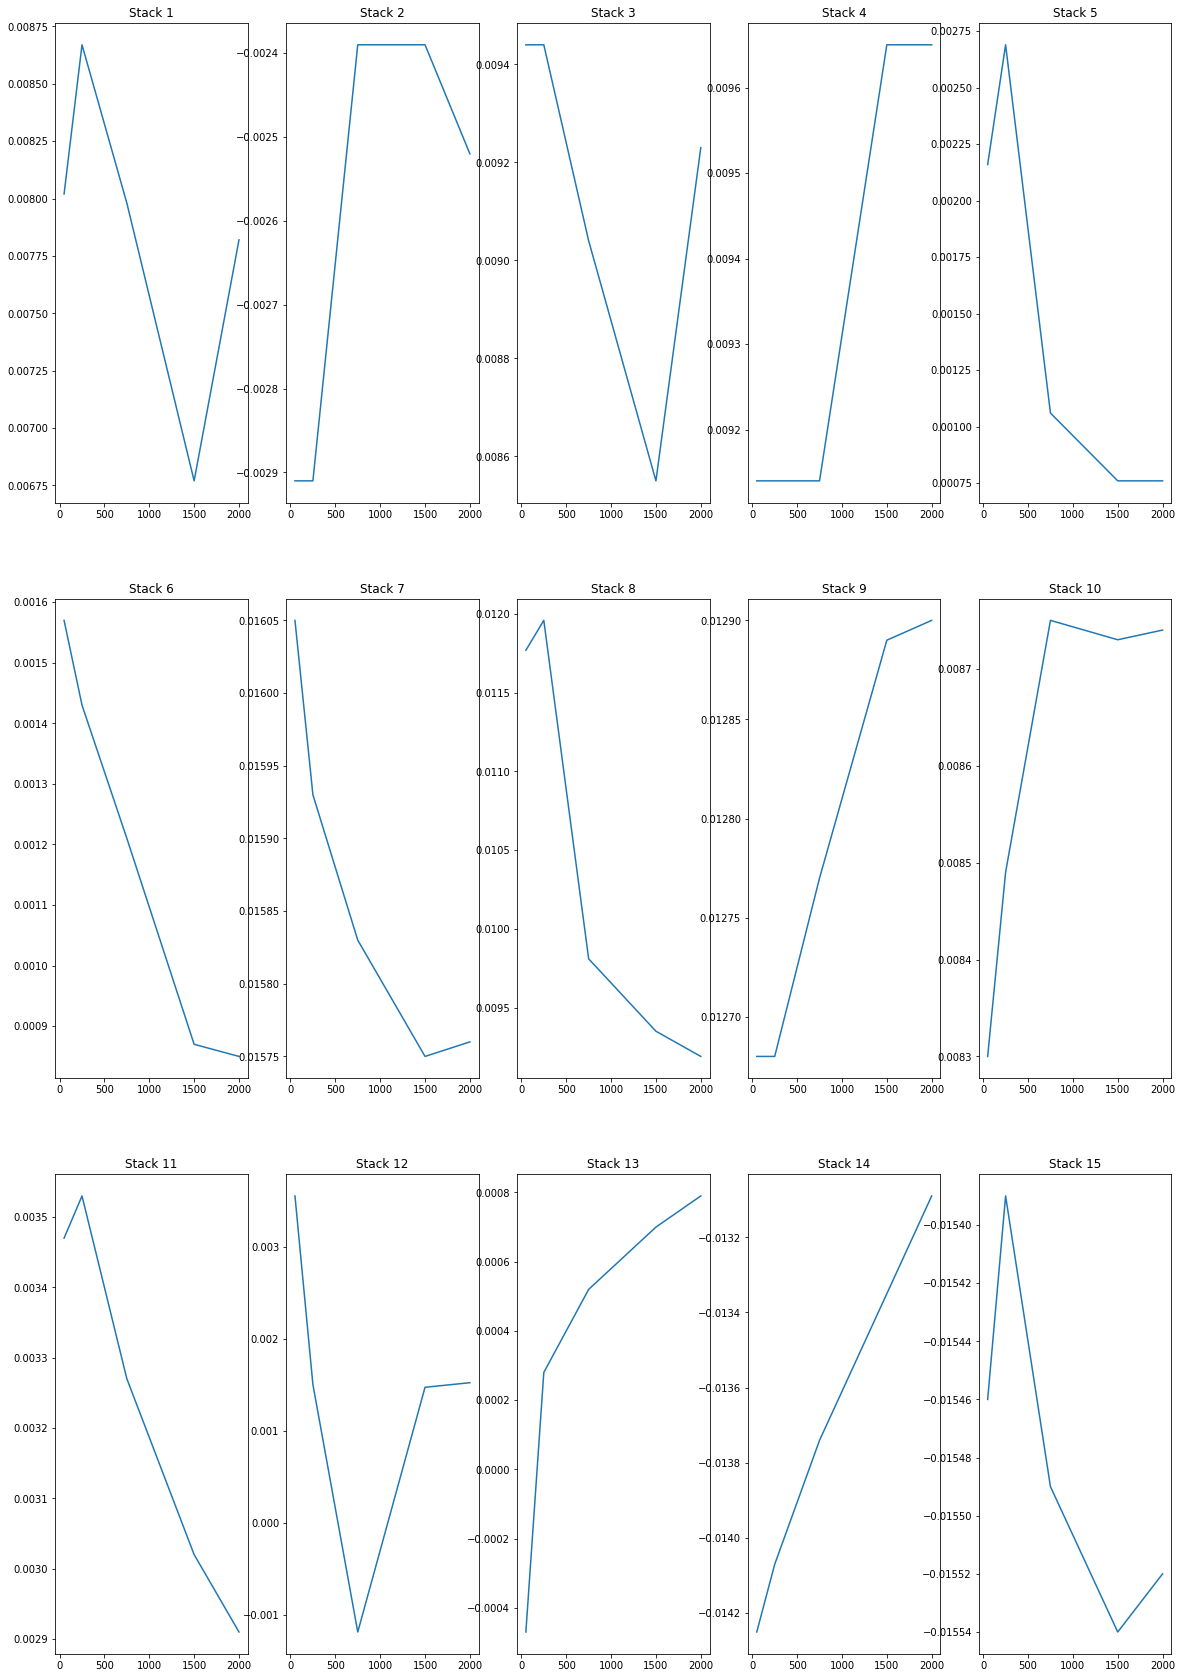

In [39]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(20,30)
j=1
for key in all_metrics.keys():
    print("getting interpolation type with", key)
    for stack in all_metrics[key].keys():
        print(stack)
        i = j-1
        stack_metrics = np.array(all_metrics[key][stack])
        order=stack_metrics[:,0].argsort()
        metrics_T = stack_metrics[order].T

        # print(metrics_T)

        bfactors = metrics_T[0]
    #     print(bfactors)

        defocus = metrics_T[1]
    #     print(defocus)

        scores = metrics_T[2]
    #     print(scores)

        fit = metrics_T[3]
    #     print(fit)
        r = i//5
        c = i%5
        axes[r, c].plot(bfactors, scores)
        axes[r, c].set_title('Stack {}'.format(j))
        j += 1
        # Fine-tune figure; hide x ticks for tostack = 'stack16'p plots and y ticks for right plots